# Estudo sobre Previsão de Vendas Utilizando Séries Temporais

## Parte 1: Pré-Processamento

### 1. Definição

Uma série temporal é uma sequência de dados ou observações coletadas e **ordenadas no tempo**. Cada dado ou ponto da série representa uma medição ou evento associado a um momento específico, podendo ser um instante ou um intervalo de tempo.

### 2. Características principais de uma série temporal
1. **Ordem temporal:** Os dados estão ordenados cronologicamente, e essa ordem importa para a análise.  

2. **Dependência temporal:** Os valores futuros podem depender dos valores passados, ou seja, há uma relação entre os pontos da série.  

3. **Frequência:** As observações podem ser coletadas em intervalos regulares (diários, mensais, anuais, etc.) ou irregulares.  

### 3. Classificação quanto ao número de variáveis independentes  

- *Série Temporal Univariada*  
  Contém apenas uma variável dependente, ou seja, uma única sequência de observações ao longo do tempo.  
  
  Exemplos:  
  Previsão de vendas semanais de uma loja.  
  Previsão da temperatura diária de uma cidade.

- *Série Temporal Multivariada*  
  Contém múltiplas variáveis, incluindo uma variável dependente e outras variáveis independentes que podem influenciá-la.  

  Exemplo:  
  Previsão de vendas semanais considerando fatores como temperatura, preço do combustível e taxa de desemprego.  
  Previsão de geração de energia considerando dados climáticos como vento, radiação solar e precipitação.



### 4. Componentes de um série temporal  

- **Tendência (Trend)**:
Representa a direção geral da série ao longo do tempo (crescimento, decrescimento ou estabilidade). Refere-se ao movimento de longo prazo ou direção geral da série temporal.  

- **Sazonalidade (Seasonality)**:
Padrões cíclicos que se repetem em **intervalos regulares**, como variações anuais ou mensais.  

- **Ciclos (Cycles)**:
Flutuações mais longas e irregulares, geralmente associadas a eventos econômicos ou sociais.  

- **Ruído (Noise)**:
Variações aleatórias ou imprevisíveis que não seguem nenhum padrão identificável.

<br>

#### 4.1. Representação Matemática de uma série temporal
A representação matemática de uma série temporal pode ser expressa de maneira geral por duas formas principais, dependendo da relação entre os componentes: **aditiva** e **multiplicativa**.  

<br>

No modelo aditivo, a série temporal ($Y_t$) é a soma de suas componentes:

$$
Yt= T_t + S_t + C_t +E_t​​
$$

-   $T_t$ ​: **Tendência** - Representa o movimento de longo prazo.

-   $S_t$​: **Sazonalidade** - Reflete padrões regulares e periódicos.

-   $C_t$​: **Ciclo** - Oscilações de médio a longo prazo sem periodicidade fixa.

-   $E_t$​: **Ruído** - Componentes aleatórios e imprevisíveis.

<br>

<br>

No modelo multiplicativo, a série temporal é o produto de suas componentes:

$$
Y_t=T_t \times S_tx \times C_t \times E_t
$$

Ou, alternativamente, em uma forma log-transformada para linearizar o modelo:

$$
ln(Y_t)=ln(T_t)+ln(S_t)+ln(C_t)+ln(E_t)
$$

-   $T_t$ ​: **Tendência** - Representa o movimento de longo prazo.

-   $S_t$​: **Sazonalidade** - Reflete padrões regulares e periódicos.

-   $C_t$​: **Ciclo** - Oscilações de médio a longo prazo sem periodicidade fixa.

-   $E_t$​: **Ruído** - Componentes aleatórios e imprevisíveis.

<br>

#### Escolha do Modelo

-   **Aditivo**: Usado quando a amplitude dos componentes sazonais e cíclicos não muda ao longo do tempo.

-   **Multiplicativo**: Usado quando a amplitude dos componentes sazonais e cíclicos aumenta ou diminui proporcionalmente à tendência.

<br>

#### Um guia para modelos de séries temporais

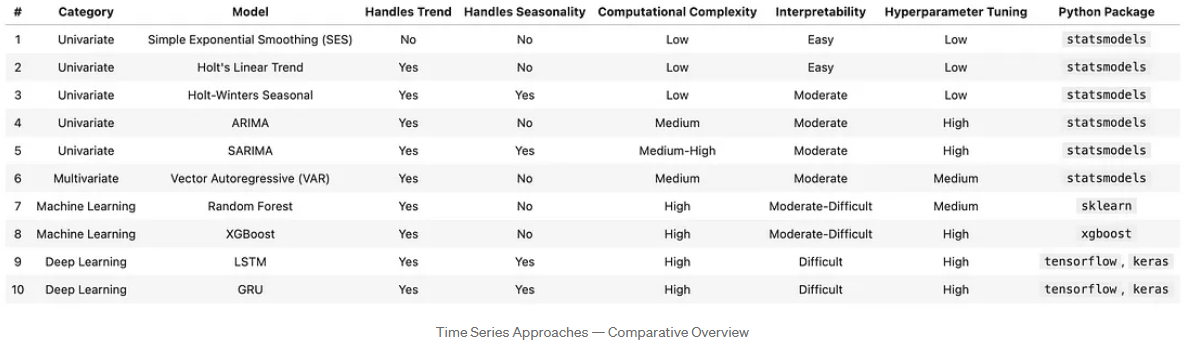

Fonte: https://medium.com/towards-data-science/time-series-from-analyzing-the-past-to-predicting-the-future-249ab99ec52d

<br>

---

## Aplicação prática

#### Instalar as bibliotecas necessárias

In [1]:
!pip install kagglehub

#### Carrregar as bibliotecas necessárias

In [ ]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from scipy.stats import skew, kurtosis

from datetime import datetime

# Realizar download do dataset a partir do Kaggle
import kagglehub

# Mapear o Google Drive no Colab e realizar download de arquivos do COlab para máquina local
from google.colab import drive, files

# Eliminar warnings
import warnings
warnings.simplefilter("ignore", category=UserWarning)

#### Carregar os arquivos de dados

In [ ]:
# Mapeia Google Drive
drive.mount('/content/drive')

# Cria diretório no Google Colab para armazenar a Kaggle Key
! mkdir ~/.kaggle

# Copia Kaggle Key do Google Drive para o Colab
!cp /content/drive/MyDrive/Projetos/Kaggle/kaggle.json ~/.kaggle/kaggle.json

# Faz o download da base de dados diretamente do Kaggle
! kaggle competitions download -c walmart-recruiting-store-sales-forecasting
print('Download finalizado')

# Descompacta o arquivo zip com o dataset
! unzip walmart-recruiting-store-sales-forecasting.zip > unzip_log.txt 2>&1
! rm -rf walmart-recruiting-store-sales-forecasting.zip
print('walmart-recruiting-store-sales-forecasting.zip descompactado')

# Descompacta os arquivos individuais
! unzip features.csv.zip > unzip_log.txt 2>&1
! rm -rf features.csv.zip
print('Arquivo features.zip descompactado')

! unzip train.csv.zip > unzip_log.txt 2>&1
! rm -rf train.csv.zip
print('Arquivo train.zip descompactado')

! unzip test.csv.zip > unzip_log.txt 2>&1
! rm -rf test.csv.zip
print('Arquivo test.zip descompactado')

! unzip sampleSubmission.csv.zip > unzip_log.txt 2>&1
! rm -rf sampleSubmission.csv.zip
print('Arquivo sampleSubmission.zip descompactado')

#### Carregar os dataframes

In [ ]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Exploração inicial dos datasets

#####**Dataset Features**

In [ ]:
features.head()

In [ ]:
features.tail()

In [ ]:
dimensao_features = features.shape

print(f'Número de observações: {dimensao_features[0]}')
print(f'Número de variáveis: {dimensao_features[1]}')

In [ ]:
features.info()

In [ ]:
# Número de lojas
lojas = features['Store'].nunique()

# Número de dias observados
dias = features['Date'].nunique()

# Menor data
data_inicial = features['Date'].min()

# Maior data
data_final = features['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

In [ ]:
# Número de valores faltantes
falta_features = features.isna().sum()
print(falta_features)

In [ ]:
# % de valores faltantes com duas casas decimais
falta_features_percent = round(100 * falta_features / len(features), 2)
print(falta_features_percent)

In [ ]:
# Quais são as datas com valores faltantes em CPI ?
datas = features['Date'][features['CPI'].isna()].unique()

# Ordenar as datas
datas.sort()

print(f'Datas com valores faltantes: {datas}')

In [ ]:
# Quais são as datas com valores faltantes em Unemployment ?
datas = features['Date'][features['Unemployment'].isna()].unique()

# Ordenar as datas
datas.sort()

print(f'Datas com valores faltantes: {datas}')

---

<br>

##### **Dataset Stores**

In [ ]:
stores.head()

In [ ]:
stores.tail()

In [ ]:
dimensao_stores = stores.shape

print(f'Número de observações: {dimensao_stores[0]}')
print(f'Número de variáveis: {dimensao_stores[1]}')

In [ ]:
stores.info()

In [ ]:
# Número de lojas
lojas = stores['Store'].nunique()

#Tipos de loja
tipos = stores['Type'].unique()

# Número de cidades
cidades = stores['Size'].nunique()

print(f'Número de lojas: {lojas}')
print(f'Tipos de loja: {tipos}')
print(f'Número de cidades: {cidades}')

In [ ]:
# Valores faltantes
stores_faltantes = stores.isna().sum()
print(stores_faltantes)

---

<br>

##### **Dataset Train**

In [ ]:
train.head()

In [ ]:
train.tail()

In [ ]:
dimensao_train = train.shape

print(f'Número de observações: {dimensao_train[0]}')
print(f'Número de variáveis: {dimensao_train[1]}')

In [ ]:
train.info()

In [ ]:
# Número de departamentos por loja
for loja in train['Store'].unique():
  print(f'\nLoja: {loja}')
  departamento = train['Dept'][train['Store'] == loja].nunique()
  print(f'Número de departamentos: {departamento}')


In [ ]:
# Número de lojas
lojas = train['Store'].nunique()

# Número de dias observados
dias = train['Date'].nunique()

# Menor data
data_inicial = train['Date'].min()

# Maior data
data_final = train['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

In [ ]:
# Valores faltantes
train_faltantes = train.isna().sum()
print(train_faltantes)

---

<br>

##### **Dataset Test**

In [ ]:
test.head()

In [ ]:
test.tail()

In [ ]:
dimensao_test = test.shape

print(f'Número de observações: {dimensao_test[0]}')
print(f'Número de variáveis: {dimensao_test[1]}')

In [ ]:
test.info()

In [ ]:
# Número de departamentos por loja
for loja in test['Store'].unique():
  print(f'\nLoja: {loja}')
  departamento = test['Dept'][test['Store'] == loja].nunique()
  print(f'Número de departamentos: {departamento}')

In [ ]:
# Número de lojas
lojas = test['Store'].nunique()

# Número de dias observados
dias = test['Date'].nunique()

# Menor data
data_inicial = test['Date'].min()

# Maior data
data_final = test['Date'].max()

print(f'Número de lojas: {lojas}')
print(f'Número de dias observador: {dias}')
print(f'Data inicial: {data_inicial}')
print(f'Data final: {data_final}')

In [ ]:
# Valores faltantes
test_faltantes = test.isna().sum()
print(test_faltantes)

---

<br>

##### **Resumo dos datasets**  
- Dataset *train*  
  - Possui 421570 observações divididas em 5 variáveis.
  - As observações foram coletadas ao longo de 143 dias, de 2010-02-05 a 2012-10-26.
  - Os dados foram obtidos a partir de 45 lojas que são especificadas por números sequenciais de 1 a 45.
  - Cada loja está dividida em departamentos, que pode variar de 63 a 79.
  - A cada tupla loja - departamento - data é atribuído o total de vendas semanais em US$.  
  - Este dataset não possui observações em branco.  

- Dataset *test*  
  - Possui 115064 observações divididas em 4 variáveis.
  - As observações foram coletadas ao longo de 39 dias, de 2012-11-02 a 2013-07-26. Ou seja, é a continuação do dataset train.  
  - Os dados foram obtidos a partir das mesma 45 lojas e das mesmas seções presentes no dataset train.
  - O dataset também não possui valores em branco.
  - A principal diferença entre os datasets train e test é que o primeiro possui a variável Weekly_Sales, já o último não. Isto deve-se ao fato de que a base foi utilizada em um concurso no Kaggle onde o objetivo principal era estimar as vendas semanais do dataset test, a partir dos dados de treinamento do dataset train.  

- Dataset *features*  
  - Possui até 8190 observações divididas em 11 variáveis.  
  - As observações foram coletadas ao longo de 182 dias, de 2010-02-05 a 2013-07-26.  
  - Foram observados dados das mesmas 45 lojas presentes nos datasets train e test, porém sem levar em conta a divisão por departamentos.  
  - O dataset possui diversas observações em branco, com os seguintes percentuais de valores faltantes:
    - MarkDown1: 50,77%  
    - MarkDown2: 64,33%  
    - MarkDown3: 55,89%  
    - MarkDown4: 57,70%
    - MarkDown5: 50,55%
    - CPI: 7,14%
    - Unemployment: 7,14%  
  - As datas com valores faltantes são as mesmas para as variáveis CPI e Unemployment. Importante destacar que o período onde os dados estão ausentes vai de 03-05-2013 a 2013-07-26. Isto poderá ocasionar problemas ao utilizarmos o dataset test para a previsão das vendas.
  - O CPI ou Consumer Price Index é um índice de inflação utilizado nos EUA, semelhante ao IPCA brasileiro.
  - O índice de Unemployment (Taxa de Desemprego) nos Estados Unidos mede a porcentagem de pessoas da força de trabalho que estão desempregadas e ativamente procurando por emprego.  
  - Por se tratarem de índices oficiais e disponíveis na Internet, é possível buscar os valores faltantes completando o dataset onde necessário.  
  - Tendo em vista que as variáveis MarkDown 1 a 5 possuem mais de 50% de valores faltantes, optei por removê-las do dataset. A utilização de técnicas de imputação geraria erros de precisão, podendo comprometer a qualidade dos dados.  

- Dataset *stores*
  - Possui 45 observações divididas em 3 variáveis.  
  - Não possui valores em branco.  

<br>

---

### OBSERVAÇÃO  

O objetivo deste projeto é estudar o desempenho de modelos para séries temporais univariadas e multivariadas. Diante desta premissa, optei por utilizar a mesma base de dados para ambos estudos.  

Para o caso univariado utilizarei apenas o dataset *TRAIN*, onde manterei as variáveis *date* e *weekly_sales*, removendo todas as demais.  

Nos modelos multivariados consolidarei os datasets *features*, *stores* e *train*, utilizando tantas variáveis quanto possível.   

---






<br>




### Adequação do dataset train

In [ ]:
train_modificado = train[['Date', 'Weekly_Sales']]
train_modificado.head()

In [ ]:
# Totalizar as vendas por data criando um dataframe com Date e Weekly_Sales, transformando Date em datetime
train_modificado = train_modificado.groupby('Date').sum().reset_index()
train_modificado['Date'] = pd.to_datetime(train_modificado['Date'])
train_modificado.head()

In [ ]:
train_modificado.info()

#### Dividir o dataset em treino e validação

Optei por utilizar 80% dos dados para treinamento e 20% para testes.

In [ ]:
df_treino = train_modificado.iloc[:int(0.8*len(train_modificado))].copy()
df_teste = train_modificado.iloc[int(0.8*len(train_modificado)):].copy()

#### Salvar o dataset modificado

In [ ]:
# Salvar df_treino e df_val
df_treino.to_csv('df_treino.csv')
df_teste.to_csv('df_teste.csv')

# Fazer download para a máquina local
files.download('df_treino.csv')
files.download('df_teste.csv')